### Random Selection Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import t
from scipy.stats import uniform
from statistics import mean
%matplotlib inline
import matplotlib.patheffects as mpe
%run ./Help_Functions_Experiments.ipynb
%run ./Experiment_Functions.ipynb
# load functions for the creation of the different distributions
pd.options.display.max_rows = 100

In [2]:
def optimal_solution_evaluation(data,col, n_chunks=200):
    temp_rewards = []
    history = []
    iteration = 0
    for chunk in np.array_split(data, n_chunks):
        alg = np.random.choice(choices) 
        for alg in choices:
            for i in range(50):
                start_time = time.perf_counter()
                sorted_dist = alg(chunk,col)
                reward = (time.perf_counter() - start_time)
                temp_rewards.append(reward)
            history.append([iteration,mean(temp_rewards),alg.__name__])
            temp_rewards = []
        iteration+=1
    df_averages = pd.DataFrame.from_records(history,columns=["Iteration","Reward","Algorithm"])
    temp = df_averages.groupby(["Iteration"])[["Reward"]].min().reset_index()
    optimal_solution = pd.merge(temp, df_averages, how='left')
    return optimal_solution,df_averages

In [3]:
def plot_optimal_solution(df_optimal_solution):
    groups = df_optimal_solution.groupby('Algorithm')
    dict_colors = {"quick_sort":'#1f77b4', "merge_sort":'#ff7f0e', "heap_sort":'#2ca02c'}
    plt.figure(figsize=(16,6))
    for name, group in groups:
            plt.plot(group.Iteration, group.Reward, marker='.', linestyle='', ms=10, alpha = 0.5, label=name, color=dict_colors[name])
    plt.legend(fontsize=26, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel("Runtime in seconds",fontsize=26)
    plt.xlabel("Iteration",fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    plt.show()

In [4]:
extended_data = pd.read_csv("Real_Data/real_data_extended.csv", index_col=0)
col = "CR863"

C:\Users\Isi\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Random Selection on Real Data: Setting 1

In [5]:
n_chunks = 2000
for chunk in np.array_split(extended_data, n_chunks):
    print(len(chunk))
    break

46000


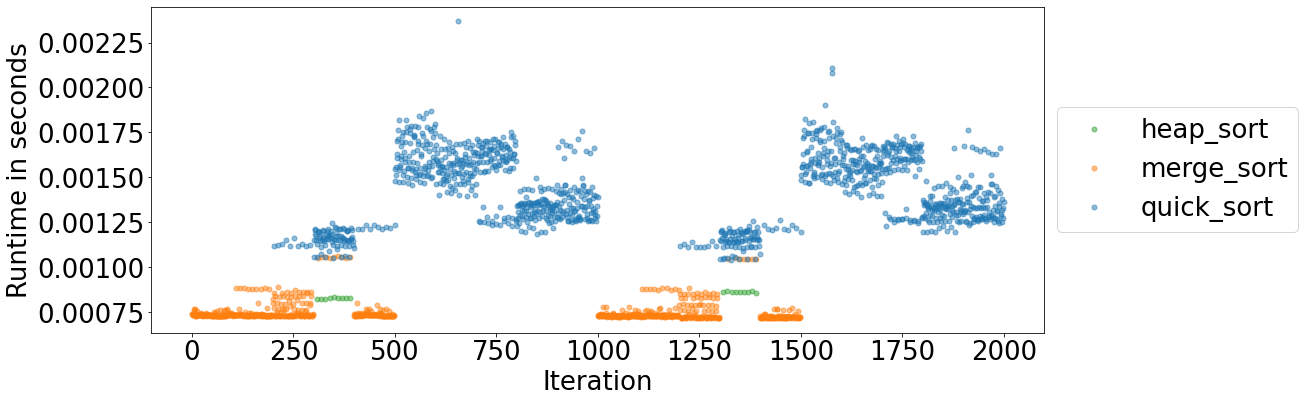

In [6]:
#df_optimal_solution_1, df_averages_1 = optimal_solution_evaluation(extended_data, n_chunks = n_chunks, col = col)
#df_optimal_solution_1.to_csv("Real_Data/optimal_solution_1.csv")
#df_averages_1.to_csv("Real_Data/optimal_solution_extended_1.csv")
plot_optimal_solution(df_optimal_solution_1)

In [6]:
optimal_solution_1 = pd.read_csv("Real_Data/optimal_solution_1.csv", index_col=0)
optimal_solution_2 = pd.read_csv("Real_Data/optimal_solution_2.csv", index_col=0)

In [7]:
print(optimal_solution_1.sum())
print(optimal_solution_2.sum())

Iteration                                              1999000
Reward                                                2.327544
Algorithm    merge_sortmerge_sortmerge_sortmerge_sortmerge_...
dtype: object
Iteration                                               124750
Reward                                                3.121417
Algorithm    merge_sortmerge_sortmerge_sortmerge_sortmerge_...
dtype: object


In [19]:
#df_optimal_solution_1[300:400]

In [18]:
#df_averages_2[0:100]

## Random Selection on Real Data: Setting 2

In [8]:
n_chunks =  500
for chunk in np.array_split(extended_data, n_chunks):
    print(len(chunk))
    break

183999


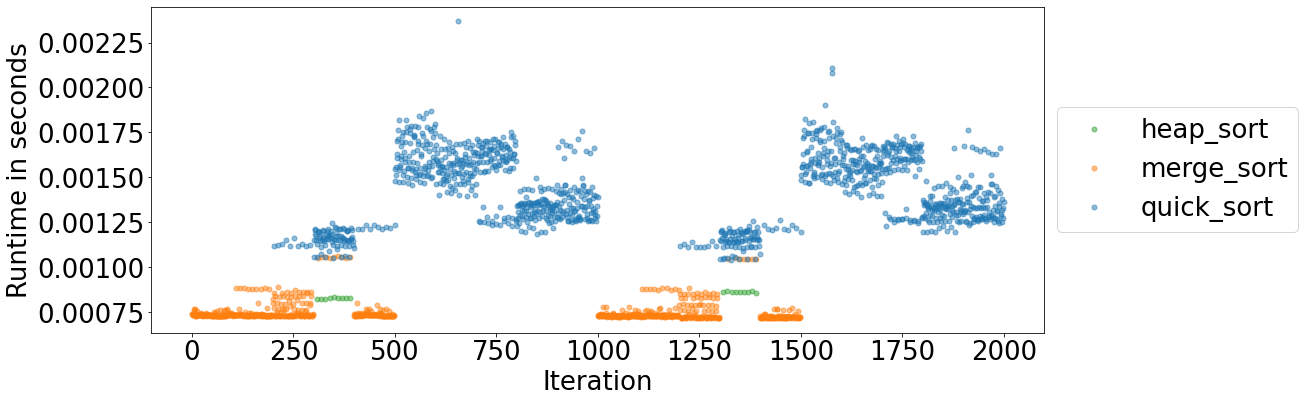

In [9]:
#df_optimal_solution_2, df_averages_2 = optimal_solution_evaluation(extended_data, n_chunks = n_chunks, col = col)
#df_optimal_solution_2.to_csv("Real_Data/optimal_solution_2.csv")
#df_averages_2.to_csv("Real_Data/optimal_solution_extended_2.csv")


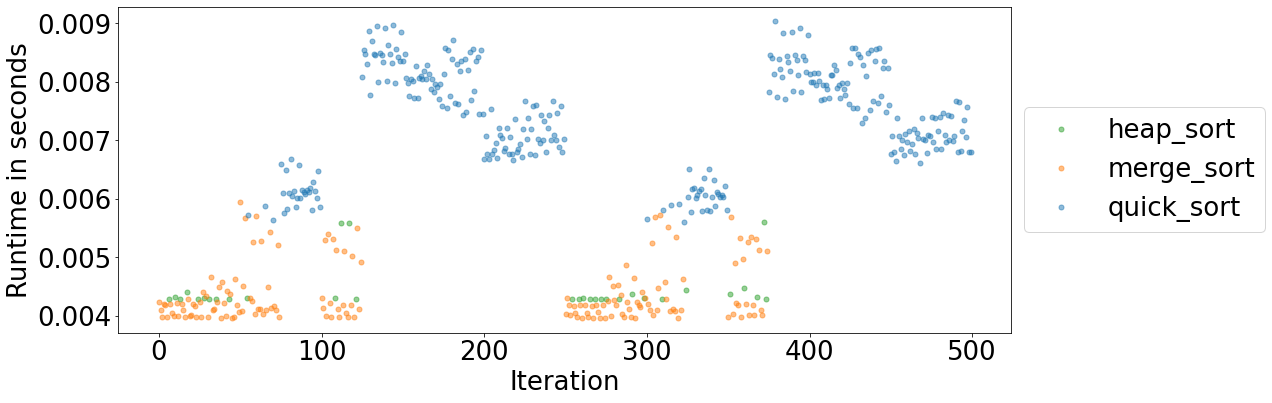

In [10]:
plot_optimal_solution(df_optimal_solution_2)